**Classification**

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.datasets import make_regression
from tensorflow.keras.datasets import fashion_mnist

In [47]:
keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [48]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
y_train.shape

(60000,)

In [51]:
print(fashion_mnist.load_data.__doc__)

Loads the Fashion-MNIST dataset.

    This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories,
    along with a test set of 10,000 images. This dataset can be used as
    a drop-in replacement for MNIST.

    The classes are:

    | Label | Description |
    |:-----:|-------------|
    |   0   | T-shirt/top |
    |   1   | Trouser     |
    |   2   | Pullover    |
    |   3   | Dress       |
    |   4   | Coat        |
    |   5   | Sandal      |
    |   6   | Shirt       |
    |   7   | Sneaker     |
    |   8   | Bag         |
    |   9   | Ankle boot  |

    Returns:

    Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data.

    **`y_train`**: `uint8` NumPy array of labels (integers in range 0-9)
      with shape `(60000,)` for the training data.

    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
    

In [54]:
# Hash Table for finding classes of indexes
class_name = {
    0: 'T-shirt/top', 
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot', 
}

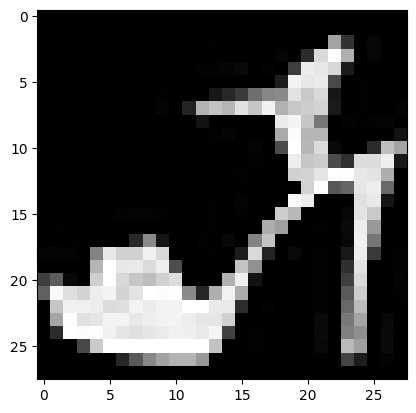

In [71]:
plt.imshow(X_train[9], cmap='gray') # cmap can render the photo with filters
plt.show()

In [56]:
class_name[y_train[0]]

'Ankle boot'

In [57]:
# Normalization
X_train = X_train / 255 
X_test = X_test / 255

In [58]:
X_train.max()

1.0

We are going to use fully connected networks here, so the input should be flatten ( it can only accsepts vectors )
we will reduce the matrix

In [59]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [60]:
from keras.utils import to_categorical

In [61]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [66]:
y_train.shape

(60000, 10)

In [67]:
y_test.shape

(10000, 10)

In [68]:
from keras.layers import Dense, Input, Flatten
from keras.models import Sequential

In [69]:
model = Sequential()
model.add(Input((28, 28)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

W0000 00:00:1737711119.020244   12922 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [70]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
import tensorflow as tf

In [80]:
loss = tf.losses.MeanSquaredError()
opt = tf.optimizers.Adam()
metric = tf.metrics.CategoricalAccuracy() # metric for accurace 
model.compile(loss = loss, optimizer = opt, metrics = [metric]) 

In [81]:
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=50)

Epoch 1/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.7583 - loss: 0.0344 - val_categorical_accuracy: 0.8605 - val_loss: 0.0207
Epoch 2/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8573 - loss: 0.0206 - val_categorical_accuracy: 0.8621 - val_loss: 0.0199
Epoch 3/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8732 - loss: 0.0184 - val_categorical_accuracy: 0.8752 - val_loss: 0.0180
Epoch 4/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8811 - loss: 0.0175 - val_categorical_accuracy: 0.8705 - val_loss: 0.0190
Epoch 5/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8854 - loss: 0.0168 - val_categorical_accuracy: 0.8731 - val_loss: 0.0187
Epoch 6/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8919 - loss: 0.0159 - val_categorical_accuracy: 0.8822 - val_loss: 0.0168
Epoch 7/50
960/960 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - categorical_accuracy: 0.8982 - los

In [82]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - categorical_accuracy: 0.8868 - loss: 0.0181


[0.018005112186074257, 0.8895000219345093]

In [83]:
y_pred = model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [86]:
y_pred[0].argmax()

9

In [98]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step


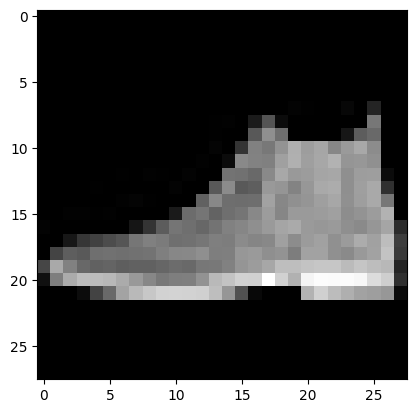

true: Ankle boot
prediction: Ankle boot


In [101]:
index = 0
plt.imshow(X_test[index], cmap='gray') # cmap can render the photo with filters
plt.show()
print(f'true: {class_name[y_test[index].argmax()]}')
print(f'prediction: {class_name[y_pred[index].argmax()]}')